In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Training Data')

print(f"- X = {train_images.shape}, y = {train_labels.shape}")

print(f"- Hols {train_images.shape[0]/70000* 100}% of the overall data")

print("\n")

print(f"- X = {test_images.shape}, y = {test_labels.shape}")
print(f"- Hols {test_images.shape[0]/70000* 100}% of the overall data")

Training Data
- X = (60000, 28, 28), y = (60000,)
- Hols 85.71428571428571% of the overall data


- X = (10000, 28, 28), y = (10000,)
- Hols 14.285714285714285% of the overall data


In [4]:
import random  # Import the random module
from matplotlib import pyplot as plt

def plot_images(nb_images_to_plot, train_data):
    # Generate a list of random indices from the training data
    random_indices = random.sample(range(len(train_data)), nb_images_to_plot)

    # Plot each image using the random indices
    for i, idx in enumerate(random_indices):
        plt.subplot(330 + 1 + i)
        plt.imshow(train_data[idx], cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')  # Hide the axis for clarity

    plt.show()


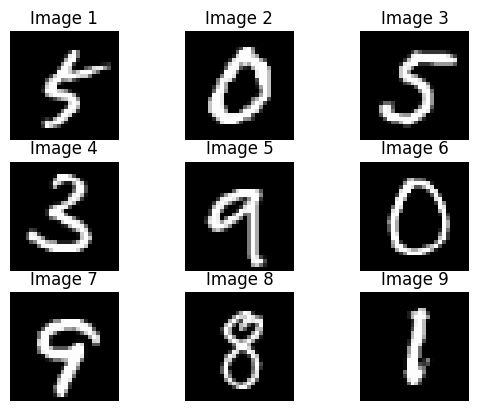

In [5]:
nb_images_to_plot = 9
plot_images(nb_images_to_plot, train_images)

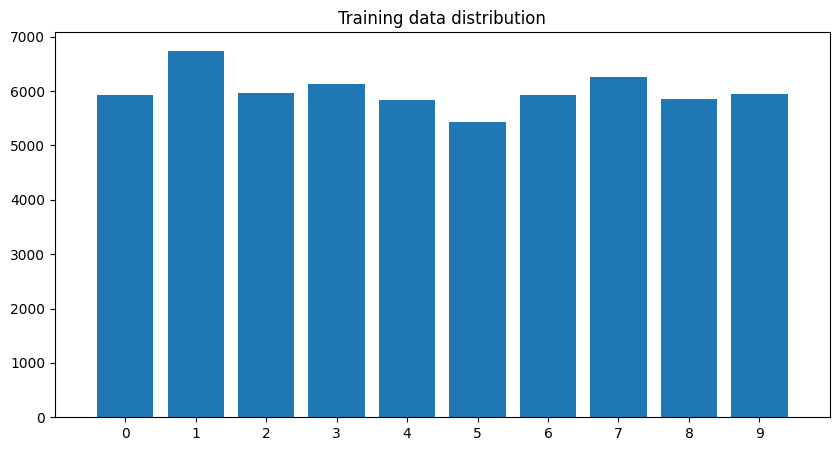

In [9]:
import numpy as np

def plot_labels_distribution(data_labels):
    
	counts = np.bincount(data_labels)
	fig, ax = plt.subplots(figsize=(10,5))
	ax.bar(range(10), counts, width=0.8, align='center')
	ax.set(xticks=range(10), xlim=[-1, 10], title='Training data distribution')

	plt.show()
 
plot_labels_distribution(train_labels)

In [10]:
from keras.utils import to_categorical

def preprocess_data(data, label,
                	vector_size,
                	grayscale_size):
    
	# Normalize to range 0-1
	preprocessed_images = data.reshape((data.shape[0],
                             	vector_size)).astype('float32') / grayscale_size
    
	# One-hot encode the labels
	encoded_labels = to_categorical(label)
    
	return preprocessed_images, encoded_labels

In [11]:
# Flattening variable
vector_size = 28 * 28

grayscale_size = 255
train_size = train_images.shape[0]
test_size = test_images.shape[0]

# Preprocessing of the training data
train_images, train_labels = preprocess_data(train_images,
                                         	train_labels,
                                         	vector_size,
                                         	grayscale_size)

# Preprocessing of the testing data
test_images, test_labels = preprocess_data(test_images,
                                       	test_labels,
                                       	vector_size,
                                       	grayscale_size)

In [12]:
print("Training data")
print(f"- Maxium Value {train_images.max()} ")
print(f"- Minimum Value {train_images.min()} ")

print("\n")

print("Testing data")
print(f"- Maxium Value {test_images.max()} ")
print(f"- Minimum Value {test_images.min()} ")

Training data
- Maxium Value 1.0 
- Minimum Value 0.0 


Testing data
- Maxium Value 1.0 
- Minimum Value 0.0 


In [15]:
from keras import models
from keras import layers

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9093 - loss: 0.2832 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9868 - loss: 0.0440 - val_accuracy: 0.9896 - val_loss: 0.0309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9922 - val_loss: 0.0257
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accuracy: 0.9885 - val_loss: 0.0413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9929 - val_loss: 0.0255
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9922 - val_loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0

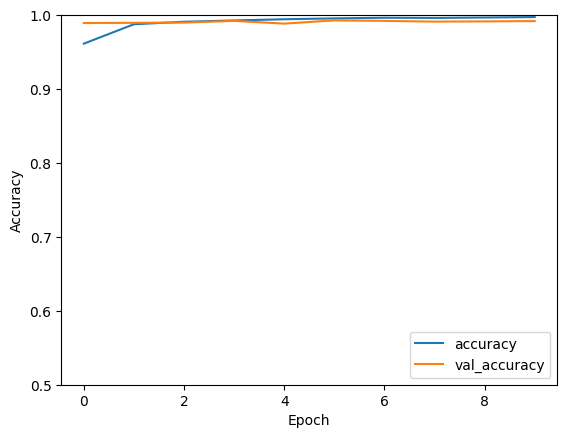

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

